In [1]:
import pandas as pd 
import numpy as np 
import xarray as xr

c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
years_list = [str(year) for year in range(2051, 2091)]
print(years_list)

['2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '2079', '2080', '2081', '2082', '2083', '2084', '2085', '2086', '2087', '2088', '2089', '2090']


In [3]:
fgoals_pr = {}
for year in years_list:
    file_name = f"{year}.csv"
    fgoals_pr[year] = pd.read_csv("D:\Min\Review GCM\FGOALS\Pr\Interpolated\\" + file_name)

In [4]:
for key, df in fgoals_pr.items():
    df = df[df.lat > -60]
    df = df.reset_index(drop = True)
    fgoals_pr[key] = df 

In [217]:
for key, df in fgoals_pr.items():
    df["mean"] = df.iloc[:,2:].max(axis = 1)

In [9]:
fgoals_tas  = {}
for year in years_list:
    file_name = f"{year}.csv"
    fgoals_tas[year] = pd.read_csv("D:\Min\Review GCM\FGOALS\Tas\Interpolated\\" + file_name)

In [10]:
for key, df in fgoals_tas.items():
    df = df[df.lat > -60]
    df = df.reset_index(drop = True)
    fgoals_tas[key] = df 

In [13]:
fgoals_hur  = {}
for year in years_list:
    file_name = f"{year}.csv"
    fgoals_hur[year] = pd.read_csv("D:\Min\Review GCM\FGOALS\Hur\Interpolated\\" + file_name)

In [17]:
def calculate_dewpoint(temp, humidity):
    A = 17.27
    B = 237.7
    alpha = ((A * temp) / (B + temp)) + np.log(humidity/100.0)
    return (B * alpha) / (A - alpha)

In [18]:
import warnings
warnings.filterwarnings(action='ignore')

In [19]:
fgoals_tdew = {}

for key in fgoals_tas.keys():
    tas = fgoals_tas[key]
    hur = fgoals_hur[key]
    tdew = pd.DataFrame()  
    tdew[["lat", 'lon']] = tas[["lat", 'lon']]  
    for day in tas.columns[2:]:  
        tdew[day] = calculate_dewpoint(tas[day], hur[day])
    fgoals_tdew[key] = tdew

In [21]:
test = fgoals_tdew['2051']

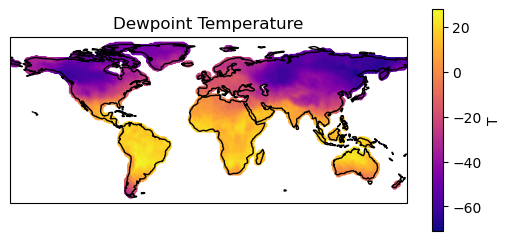

In [22]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

lons = test['lon'].values
lats = test['lat'].values
precipitation = test["2051-01-01 12:00:00"].values

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

num_colors = 100

cmap = plt.get_cmap('plasma', num_colors)

norm = plt.Normalize(precipitation.min(), precipitation.max())
sc = ax.scatter(lons, lats, c=precipitation, cmap=cmap, norm=norm, s=10)
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, orientation='vertical', label='T')

ax.coastlines()
#ax.gridlines()
plt.title("Dewpoint Temperature")
# Show the plot
plt.show()


In [54]:
data =fgoals_pr.copy()

In [103]:
mean_rx1_df = pd.DataFrame(index=data.keys(), columns=['mean_rx1'])

In [104]:
mean_rx = []
for key, df in data.items():
    rx1 = df.iloc[:,2:].max().mean()
    mean_rx.append(rx1)

In [105]:
mean_rx1_df["mean_rx1"] = mean_rx

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
mean_rx1_df.reset_index(inplace=True)

In [108]:
mean_rx1_df.rename({'index':'Year'}, axis = 1, inplace=True)

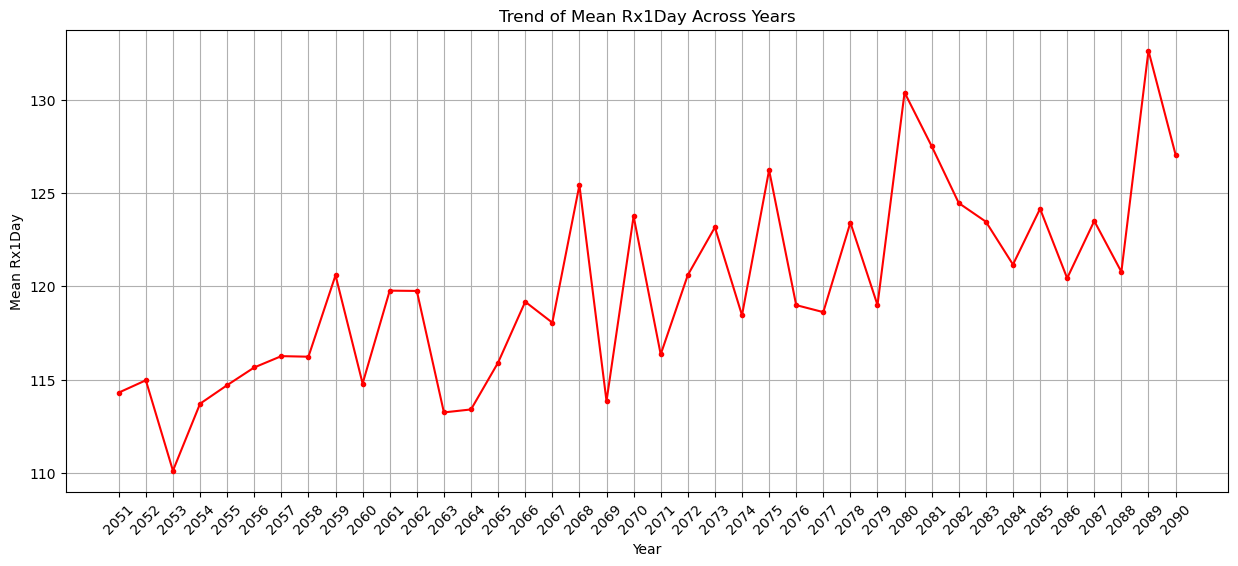

In [110]:
plt.figure(figsize=(15, 6))
plt.plot(mean_rx1_df['Year'], mean_rx1_df['mean_rx1'], marker='.', color = 'red')
plt.xlabel('Year')
plt.ylabel('Mean Rx1Day')
plt.title('Trend of Mean Rx1Day Across Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [138]:
rx1day = data.copy()
for key, df in rx1day.items():
    df["rx1day"] = df.iloc[:,2:].max(axis = 1)
    rx1day[key] = df

In [139]:
rx1day["2051"]

,lat,lon,2051-01-01 12:00:00,2051-01-02 12:00:00,2051-01-03 12:00:00,2051-01-04 12:00:00,2051-01-05 12:00:00,2051-01-06 12:00:00,2051-01-07 12:00:00,2051-01-08 12:00:00,...,2051-12-23 12:00:00,2051-12-24 12:00:00,2051-12-25 12:00:00,2051-12-26 12:00:00,2051-12-27 12:00:00,2051-12-28 12:00:00,2051-12-29 12:00:00,2051-12-30 12:00:00,2051-12-31 12:00:00,rx1day
0,6.0,0.0,0.100733,0.055160,0.101714,0.019403,0.156207,0.099898,0.056895,0.717735,...,0.068512,0.194387,0.185484,0.027651,0.041056,0.047205,0.247372,8.262027e-03,1.908413e-06,26.094131
1,7.0,0.0,0.098833,0.000745,0.145933,0.000928,0.231620,0.001286,0.048145,0.947090,...,0.079365,0.251129,0.248547,0.037065,0.001069,0.018859,0.357004,1.056599e-04,1.095333e-06,31.652572
2,8.0,0.0,0.065248,0.035302,0.086231,0.010239,0.112597,0.050431,0.034450,0.491501,...,0.046046,0.129426,0.124544,0.018894,0.017228,0.021812,0.177690,4.363569e-03,3.369866e-06,19.185843
3,9.0,0.0,0.020332,0.002564,0.049423,0.000204,0.000837,0.005675,0.000400,0.004077,...,0.000439,0.001058,0.000974,0.000155,0.003434,0.002549,0.001413,8.868549e-05,1.801171e-07,45.193225
4,10.0,0.0,0.019290,0.018694,0.037037,0.000032,0.010729,0.002357,0.002238,0.046877,...,0.003667,0.011618,0.011503,0.001749,0.004796,0.025789,0.022254,3.040416e-08,1.722272e-05,27.441486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14997,52.0,360.0,5.076746,5.226594,1.700435,0.696868,1.942350,1.433624,0.501023,0.246125,...,0.498303,0.339717,3.427202,12.719349,4.293529,1.503127,7.498575,2.998806e+00,1.343040e+00,24.643170
14998,53.0,360.0,3.548491,3.808140,1.408173,0.681755,2.086702,1.328465,0.518720,0.291765,...,0.345833,0.451956,2.565984,12.959352,4.693790,1.642800,6.528838,4.086290e+00,9.439019e-01,24.482149
14999,54.0,360.0,4.686695,2.435876,1.232096,0.625628,2.072854,1.180661,0.479099,0.297937,...,0.211083,1.419113,2.108829,12.810521,5.673764,1.492712,6.641249,4.521321e+00,5.322087e-01,25.553301
15000,55.0,360.0,6.125311,2.307206,1.251832,0.733716,1.848108,0.922472,0.467377,0.340171,...,0.227413,1.849619,1.968008,11.121749,6.518192,1.191048,7.031623,4.286093e+00,6.770237e-01,26.430321


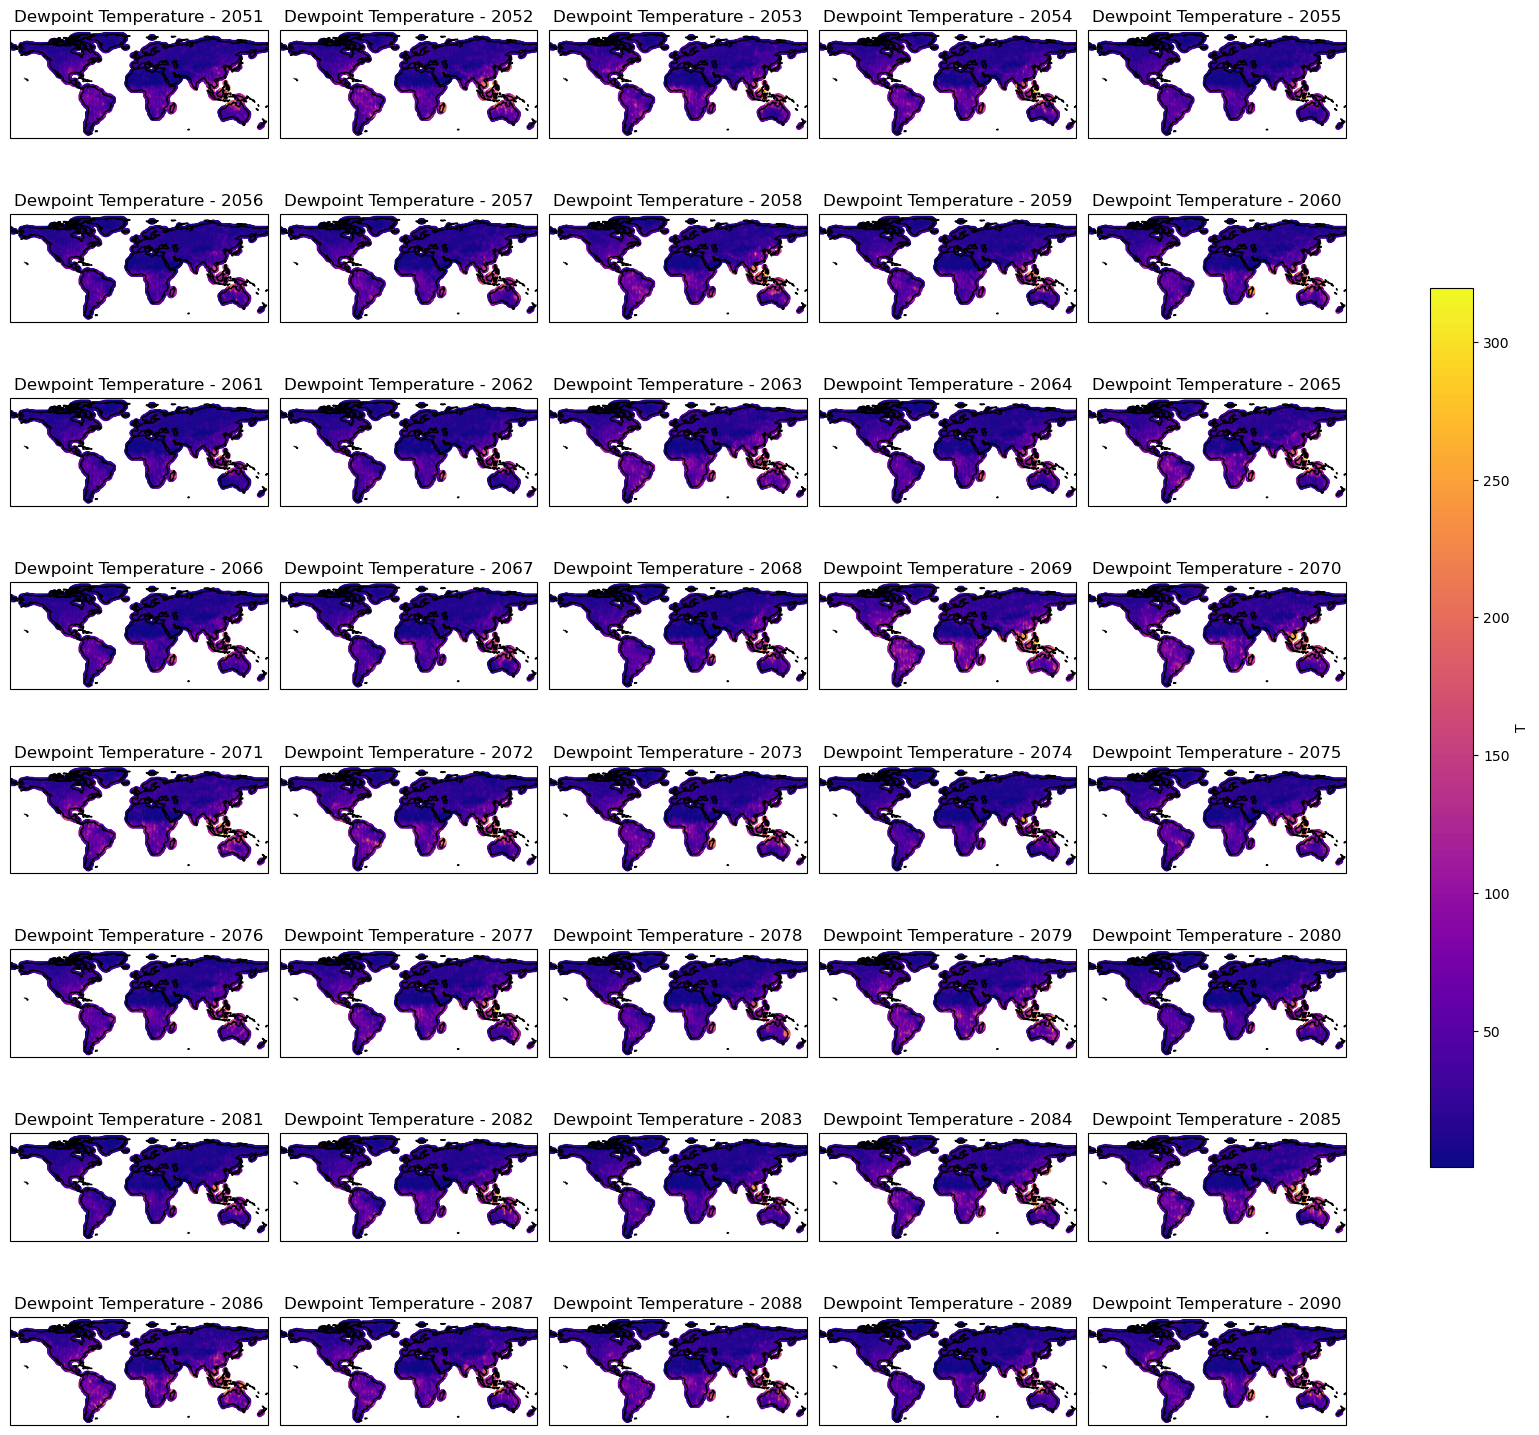

In [149]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np


fig, axs = plt.subplots(nrows=8, ncols=5, figsize=(17, 15), subplot_kw={'projection': ccrs.PlateCarree()})

axs = axs.flatten()

for i, (key, df) in enumerate(rx1day.items()):
    lons = df['lon'].values
    lats = df['lat'].values
    precipitation = df["rx1day"].values

    num_colors = 100
    cmap = plt.get_cmap('plasma', num_colors)

    norm = plt.Normalize(precipitation.min(), precipitation.max())
    sc = axs[i].scatter(lons, lats, c=precipitation, cmap=cmap, norm=norm, s=10)
    axs[i].set_title(f"Dewpoint Temperature - {key}")
    axs[i].coastlines()

plt.tight_layout()

cbar = plt.colorbar(sc, ax=axs, shrink=0.6, orientation='vertical', label='T')

plt.show()


In [111]:
data_t = fgoals_tdew.copy()

In [23]:
pr = list(fgoals_pr.values())
pr = pd.concat([df.set_index(['lat', 'lon']) for df in pr], axis=1).reset_index()

In [24]:
pr['lat_lon'] = pr['lat'].astype(str) + ',' + pr['lon'].astype(str)
pr = pr.drop(['lat', 'lon'], axis=1)

In [25]:
pr_long = pd.melt(pr, id_vars=['lat_lon'], var_name='date', value_name='pr')

In [26]:
tdew = list(fgoals_tdew.values())
tdew  = pd.concat([df.set_index(['lat', 'lon']) for df in tdew], axis=1).reset_index()

In [27]:
tdew['lat_lon'] = tdew['lat'].astype(str) + ',' +  tdew['lon'].astype(str)
tdew = tdew.drop(['lat', 'lon'], axis=1)

In [28]:
tdew_long = pd.melt(tdew, id_vars=['lat_lon'], var_name='date', value_name='tdew')

In [29]:
pr_long["tdew"] = tdew_long['tdew'].values

In [30]:
pr_long = pr_long[pr_long.pr > 1]

In [31]:
pr_long 

,lat_lon,date,pr,tdew
31,"40.0,0.0",2051-01-01 12:00:00,7.306230,-7.888423
32,"41.0,0.0",2051-01-01 12:00:00,8.616739,-9.252419
33,"42.0,0.0",2051-01-01 12:00:00,8.480399,-9.423529
34,"43.0,0.0",2051-01-01 12:00:00,6.729686,-11.784964
35,"44.0,0.0",2051-01-01 12:00:00,6.434341,-12.232869
...,...,...,...,...
219029191,"42.0,360.0",2090-12-31 12:00:00,1.023202,-20.999234
219029196,"53.0,360.0",2090-12-31 12:00:00,1.074159,-11.576299
219029197,"54.0,360.0",2090-12-31 12:00:00,2.140498,-10.268536
219029198,"55.0,360.0",2090-12-31 12:00:00,3.162778,-10.121776


In [32]:
import statsmodels.api as sm
result = pr_long.groupby('lat_lon').apply(lambda group: sm.QuantReg(np.log(group['pr']), sm.add_constant(group[['tdew']])).fit(q=0.99))

c:\Users\USER2\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\USER2\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\USER2\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\USER2\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\USER2\anaconda3\Lib\site-packages\statsmodels\regression\quantile_regressio

In [33]:
dfs = []

for group_key, group_result in result.items():
    lat_lon = group_key
    slope_coefficient = group_result.params['tdew']  
    df = pd.DataFrame({'lat_lon': [lat_lon], 'slope_coefficient': [slope_coefficient]})
    dfs.append(df)

coefficients_df = pd.concat(dfs, ignore_index=True)

In [34]:
coefficients_df["Scaling"] = 100*(np.e**coefficients_df["slope_coefficient"] - 1)

In [35]:
coefficients_df[['lat', 'lon']] = coefficients_df['lat_lon'].str.split(',', expand=True)

coefficients_df['lat'] = pd.to_numeric(coefficients_df['lat'])
coefficients_df['lon'] = pd.to_numeric(coefficients_df['lon'])

df = coefficients_df.drop('lat_lon', axis=1)

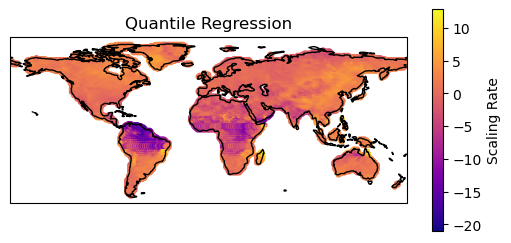

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

lons = df['lon'].values
lats = df['lat'].values
precipitation = df["Scaling"].values

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

num_colors = 1000

cmap = plt.get_cmap('plasma', num_colors)

norm = plt.Normalize(precipitation.min(), precipitation.max())
sc = ax.scatter(lons, lats, c=precipitation, cmap=cmap, norm=norm, s=10)
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, orientation='vertical', label='Scaling Rate')

ax.coastlines()
#ax.gridlines()
plt.title("Quantile Regression")
# Show the plot
plt.show()


In [37]:
df = pr_long.copy()

In [38]:
n_bins = 20

df['bin'] = df.groupby('lat_lon')['tdew'].transform(lambda x: pd.qcut(x, q=n_bins, labels=False, duplicates='drop'))

In [39]:
df[df.lat_lon == '40.0,0.0']['bin'].nunique()

20

In [40]:
dfs = df.drop(['date'], axis = 1)

In [41]:
result = dfs.groupby(['lat_lon', 'bin']).agg({'pr': lambda x: x.quantile(0.99), 'tdew': 'mean'}).reset_index()
result['log_p_99'] = result['pr'].apply(lambda x: 0 if x <= 0 else 1 if x == 1 else np.log(x))

In [42]:
result.columns = ['lat_lon', 'bin', 'p_99_pr', 'mean_tdew', 'log_p99']

In [43]:
result

,lat_lon,bin,p_99_pr,mean_tdew,log_p99
0,"-1.0,10.0",0,83.533446,7.677219,4.425247
1,"-1.0,10.0",1,83.556049,10.095820,4.425518
2,"-1.0,10.0",2,73.020913,11.107059,4.290746
3,"-1.0,10.0",3,72.128017,11.875115,4.278443
4,"-1.0,10.0",4,68.182724,12.487897,4.222191
...,...,...,...,...,...
300035,"9.0,9.0",15,51.040379,18.058412,3.932617
300036,"9.0,9.0",16,41.196527,18.694943,3.718354
300037,"9.0,9.0",17,30.621862,19.406844,3.421714
300038,"9.0,9.0",18,55.095568,20.523812,4.009069


In [44]:
from scipy.stats import linregress

In [45]:
slopes = []

for lat_lon, group in result.groupby('lat_lon'):

    slope, _, _, _, _ = linregress(group['mean_tdew'], group['log_p99'])

    slopes.append({'lat_lon': lat_lon, 'slope': slope})

slope_df = pd.DataFrame(slopes)

In [46]:
slope_df["Scaling"] = 100*(np.e**slope_df["slope"] - 1)

In [47]:
slope_df 

,lat_lon,slope,Scaling
0,"-1.0,10.0",-0.065233,-6.315084
1,"-1.0,101.0",0.019775,1.997207
2,"-1.0,102.0",0.016403,1.653829
3,"-1.0,103.0",0.020320,2.052820
4,"-1.0,104.0",0.019214,1.939933
...,...,...,...
14997,"9.0,6.0",-0.020923,-2.070547
14998,"9.0,7.0",-0.024484,-2.418675
14999,"9.0,79.0",0.028080,2.847825
15000,"9.0,8.0",-0.003197,-0.319194


In [48]:
slope_df[['lat', 'lon']] = slope_df['lat_lon'].str.split(',', expand=True)

slope_df['lat'] = pd.to_numeric(slope_df['lat'])
slope_df['lon'] = pd.to_numeric(slope_df['lon'])

slope_df = slope_df.drop('lat_lon', axis=1)

In [53]:
coefficients_df.to_csv("Quantile Regression.csv")

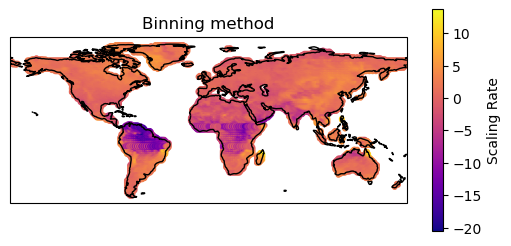

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

lons = slope_df['lon'].values
lats = slope_df['lat'].values
precipitation = slope_df["Scaling"].values

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

num_colors = 1000

cmap = plt.get_cmap('plasma', num_colors)

norm = plt.Normalize(precipitation.min(), precipitation.max())
sc = ax.scatter(lons, lats, c=precipitation, cmap=cmap, norm=norm, s=10)
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, orientation='vertical', label='Scaling Rate')

ax.coastlines()
#ax.gridlines()
plt.title("Binning method")
# Show the plot
plt.show()


In [152]:
qr = coefficients_df.copy()
bm = slope_df.copy()

In [154]:
qr.drop(["lat_lon", "slope_coefficient"], axis =1 , inplace = True)

In [163]:
diff = pd.DataFrame()

In [165]:
diff[["lat", "lon", "qr"]] = qr[["lat", 'lon', "Scaling"]]

In [167]:
diff["bm"] = bm["Scaling"]

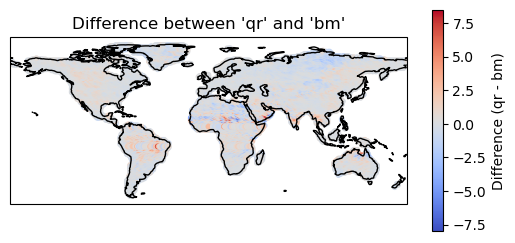

In [169]:
# Calculate the difference between 'qr' and 'bm'
diff['diff'] = diff['qr'] - diff['bm']

# Create a scatter plot on a map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Scatter plot with the difference values
sc = ax.scatter(diff['lon'], diff['lat'], c=diff['diff'], cmap='coolwarm', s=10)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, orientation='vertical', label='Difference (qr - bm)')

# Add coastlines and title
ax.coastlines()
plt.title("Difference between 'qr' and 'bm'")

# Show the plot
plt.show()

In [171]:
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(diff['qr'], diff['bm'])
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 15.36577851662682
P-value: 7.01825702502625e-53
